In [172]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [173]:
df = pd.read_csv("https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/temperature_prediction/weather.csv", index_col = "DATE")

In [174]:
df


,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
nullpct= df.apply(pd.isnull).sum()/df.shape[0]
nullpct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [176]:
valid_columns = df.columns[nullpct<0.45]
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN'],
      dtype='object')

In [177]:
df.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [178]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [179]:
import numpy as np
df = df[valid_columns].copy()
df["NEXT"] = df["TMAX"].shift(-1)


from sklearn.impute import SimpleImputer
new  = SimpleImputer(missing_values= np.nan, strategy="mean")
columns_to_impute = df.columns[3:-1]

new.fit(df[columns_to_impute])

df[columns_to_impute] = new.transform(df[columns_to_impute])
df = df.ffill()
df = df.drop('AWND', axis=1)
df

,STATION,NAME,PGTM,PRCP,SNOW,SNWD,TMAX,TMIN,NEXT
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.08,0.0,0.0,67.0,54.0,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,58.0,48.0,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,56.0,43.0,61.0


In [180]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 0.1)
xpred= df.columns[~df.columns.isin(["NEXT", "NAME", "STATION"])]

In [181]:
def backtest(df,model,xpred,start=3650, step= 60):
  allpred=[]
  for i in range(start, df.shape[0], step):
    train = df.iloc[:i,:]
    test = df.iloc[i:(i+step),:]
    model.fit(train[xpred],train["NEXT"])
    preds = model.predict(test[xpred])
    preds = pd.Series(preds, index = test.index)
    combined = pd.concat([test["NEXT"],preds], axis = 1)
    combined.columns = ["actual", "predictions"]
    combined["diff"]= (combined["predictions"] - combined["actual"]).abs()
    allpred.append(combined)
  return pd.concat(allpred)

In [182]:
df

,STATION,NAME,PGTM,PRCP,SNOW,SNWD,TMAX,TMIN,NEXT
DATE,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.08,0.0,0.0,67.0,54.0,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,58.0,48.0,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1383.805852,0.00,0.0,0.0,56.0,43.0,61.0


In [183]:
df['predictions'] = np.nan

# Use ffill to fill missing values in the DataFrame
df = df.ffill()

# Call the backtest function with the modified DataFrame
prediction = backtest(df, rr, xpred)
prediction.sort_values("diff", ascending = False)

,actual,predictions,diff
DATE,,,
2007-03-26,78.0,49.722789,28.277211
1999-01-02,53.0,25.868657,27.131343
1998-03-26,80.0,53.034265,26.965735
1985-04-18,84.0,57.095742,26.904258
1990-03-12,85.0,58.157097,26.842903
...,...,...,...
1993-08-11,77.0,77.002547,0.002547
2019-03-01,40.0,40.001734,0.001734
2001-09-20,76.0,75.998640,0.001360


In [184]:
prediction["diff"].mean()

5.1393335737415295

<Axes: >

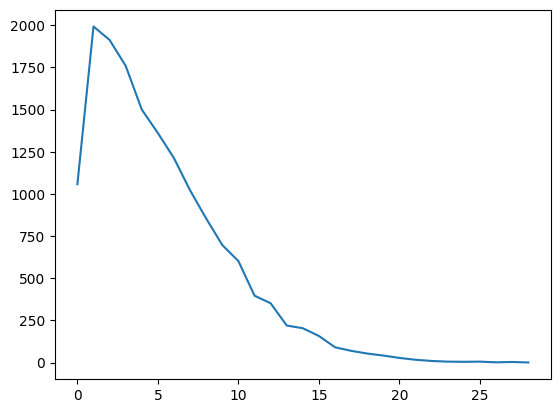

In [185]:
prediction["diff"].round().value_counts().sort_index().plot()